In [1]:
import pandas as pd 
import matplotlib.pyplot  as plt 
import numpy as np 
from ipywidgets import interact

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Clean_Social_buzz_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL,Reaction Type,Datetime,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,disgust,2020-11-07 09:43:50,negative,0.0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,dislike,2021-06-17 12:22:51,negative,10.0
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,scared,2021-04-18 05:13:58,negative,15.0
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,disgust,2021-01-06 19:13:01,negative,0.0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,interested,2020-08-23 12:25:58,positive,30.0


In [4]:
df.isnull().sum()

Unnamed: 0          0
Content ID          0
User ID             0
Type                0
Category            0
URL              4517
Reaction Type       0
Datetime            0
Sentiment           0
Score               0
dtype: int64

In [5]:
df = df.drop(columns=['URL'])

In [6]:
df.shape

(24573, 9)

In [7]:
df['Reaction Type'].value_counts()

Reaction Type
heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: count, dtype: int64

In [45]:
df['Type'].value_counts()

Type
photo    6589
video    6245
GIF      6079
audio    5660
Name: count, dtype: int64

In [8]:
df['Category'].value_counts()

Category
animals              1765
healthy eating       1711
technology           1667
science              1662
cooking              1640
travel               1618
food                 1606
culture              1586
education            1397
soccer               1334
tennis               1328
studying             1303
dogs                 1283
fitness              1257
veganism             1200
public speaking      1157
Fitness               138
Science               116
Animals                92
Food                   91
Soccer                 65
"soccer"               58
"dogs"                 55
"culture"              49
Studying               45
Culture                41
"animals"              40
"veganism"             37
Education              36
Public Speaking        32
Travel                 29
"public speaking"      28
"technology"           28
"cooking"              24
"science"              18
"studying"             15
Veganism               11
Healthy Eating          6
Tec

In [9]:
category = df['Category'].unique()

for i in category:
    word = i.lower()
    df['Category'].replace(i, word.replace('"',""),inplace=True)


In [10]:
df.head()

,Unnamed: 0,Content ID,User ID,Type,Category,Reaction Type,Datetime,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,disgust,2020-11-07 09:43:50,negative,0.0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,dislike,2021-06-17 12:22:51,negative,10.0
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,scared,2021-04-18 05:13:58,negative,15.0
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,disgust,2021-01-06 19:13:01,negative,0.0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,interested,2020-08-23 12:25:58,positive,30.0


In [11]:
def reaction(x):
    df1 = df[df['Reaction Type'] == x]
    print(df1['Category'].value_counts().head(10))
    plt.figure(figsize=(15,4))
    plt.bar(list(df1['Category'].value_counts().head(10).keys()),list(df1['Category'].value_counts().head(10)))
    plt.title('Category By Reaction Type')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.plot()
    print('-------------------------------------------------------------------------------------------------------------')
    print(df1['Type'].value_counts())
    plt.figure(figsize=(15,4))
    plt.bar(list(df1['Type'].value_counts().head(10).keys()),list(df1['Type'].value_counts().head(10)))
    plt.title('Content Type By Reaction Type')
    plt.xlabel('Content Type')
    plt.ylabel('Count')
    plt.plot()
    print('-------------------------------------------------------------------------------------------------------------')
    print(df1['User ID'].value_counts().head(10))
    print('-------------------------------------------------------------------------------------------------------------')
    
interact(reaction,x = df['Reaction Type'].unique());


interactive(children=(Dropdown(description='x', options=('disgust', 'dislike', 'scared', 'interested', 'peekin…

In [12]:
def reaction(x):
    df1 = df[df['Category'] == x]
    print('Score of the', x, '= ',df1['Score'].sum())
    print('-------------------------------------------------------------------------------------------------------------')
    print(df['Sentiment'].value_counts())
    plt.figure(figsize=(15,4))
    plt.bar(list(df1['Sentiment'].value_counts().head(10).keys()),list(df1['Sentiment'].value_counts().head(10)))
    plt.title('Sentiment By Category')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.plot()
    print('-------------------------------------------------------------------------------------------------------------')
    print(df1['User ID'].value_counts().head(10))
    print('-------------------------------------------------------------------------------------------------------------')
    print(df1['Reaction Type'].value_counts())
    plt.figure(figsize=(15,4))
    plt.bar(list(df1['Reaction Type'].value_counts().head(10).keys()),list(df1['Reaction Type'].value_counts().head(10)))
    plt.title('Reaction Type By Category')
    plt.xlabel('Reaction Type')
    plt.ylabel('Count')
    plt.plot()
    print('-------------------------------------------------------------------------------------------------------------')
interact(reaction,x = df['Category'].unique());

interactive(children=(Dropdown(description='x', options=('studying', 'healthy eating', 'technology', 'food', '…

[]

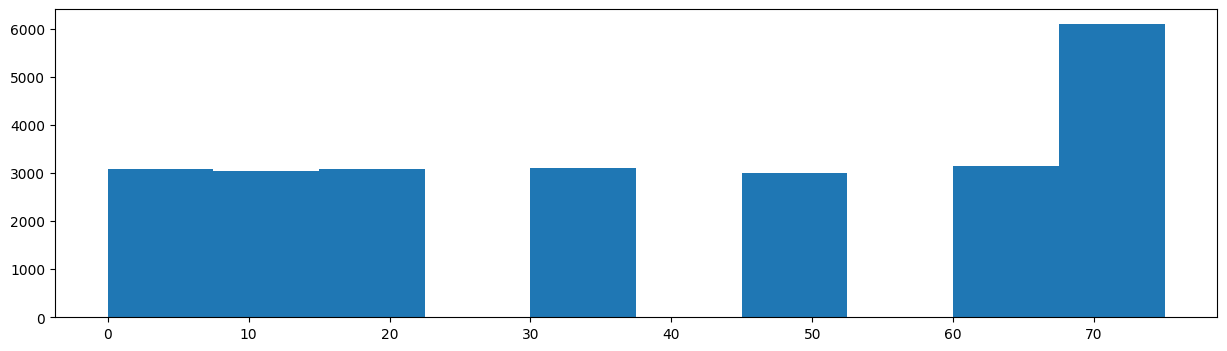

In [13]:
plt.figure(figsize=(15,4))
plt.hist(list(df['Score']))
plt.plot()

In [14]:
df.head(1)

,Unnamed: 0,Content ID,User ID,Type,Category,Reaction Type,Datetime,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,disgust,2020-11-07 09:43:50,negative,0.0


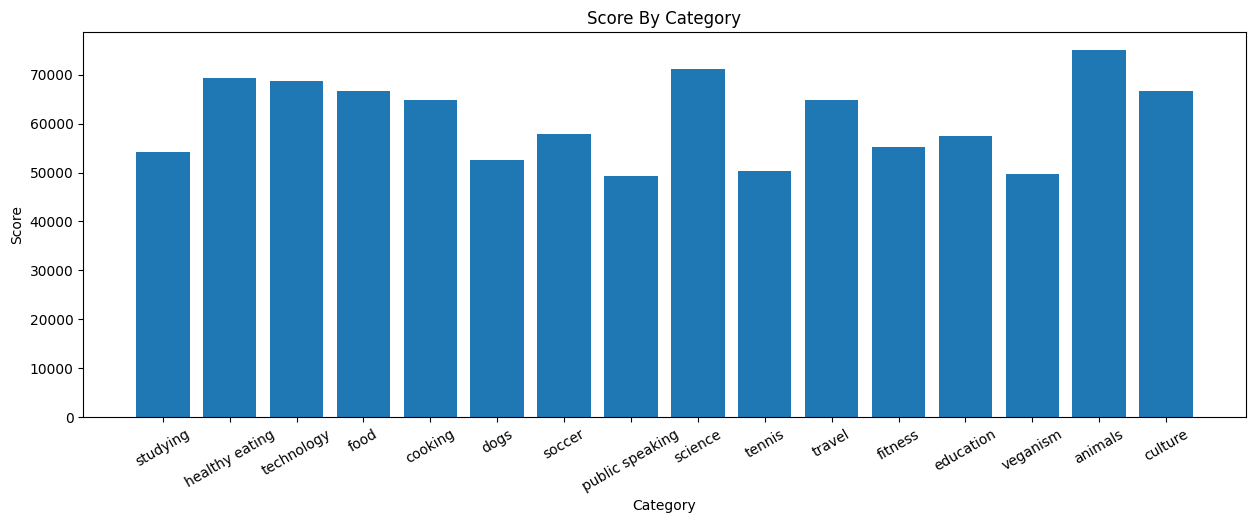

In [19]:
category = list(df['Category'].unique())
Score = []
N = []
P = []
Nu = []
for i in category:
    S = df[df['Category'] == i]['Score'].sum()
    D = df[df['Category'] == i]
    Sen = D[D['Sentiment'] == 'negative'].value_counts().sum()
    N.append(Sen)
    Sen = D[D['Sentiment'] == 'positive'].value_counts().sum()
    P.append(Sen)
    Sen = D[D['Sentiment'] == 'neutral'].value_counts().sum()
    Nu.append(Sen)
    Score.append(S)
d = {'Category':category,'Score':Score,'Negative_Sentiment':N,'Positive_Sentiment':P,'Neutral_Sentiment':Nu}
Df = pd.DataFrame(data=d)
plt.figure(figsize=(15,5))
plt.bar(category,Score)
plt.title('Score By Category')
plt.xticks(rotation=30)
plt.xlabel('Category')
plt.ylabel('Score')
plt.show()

In [21]:
Df = Df.sort_values(by=['Score'],ascending=False)

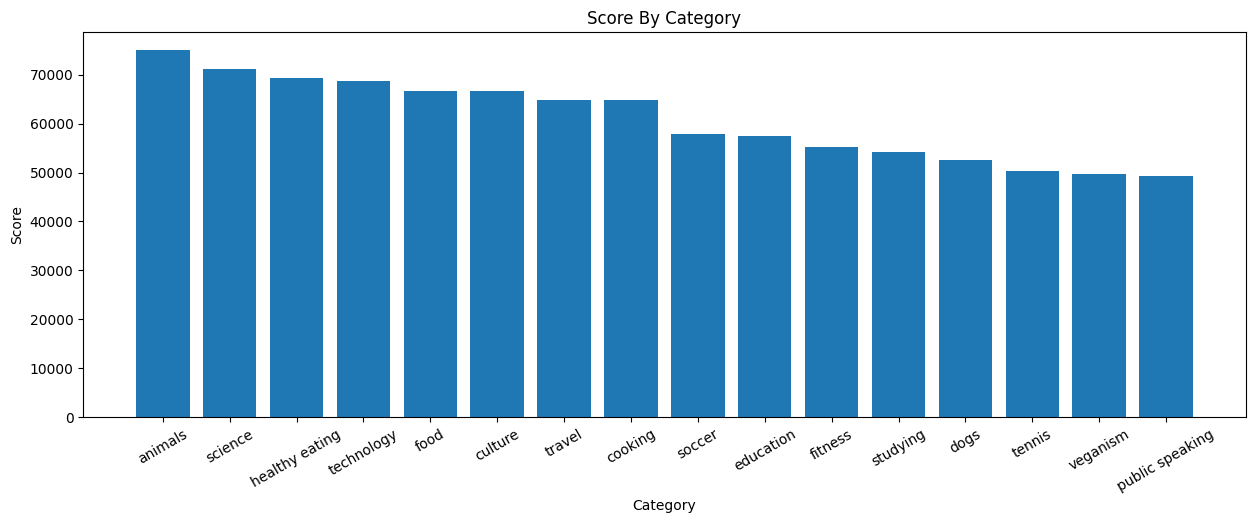

In [24]:
plt.figure(figsize=(15,5))
plt.bar(Df['Category'],Df['Score'])
plt.title('Score By Category')
plt.xticks(rotation=30)
plt.xlabel('Category')
plt.ylabel('Score')
plt.show()

In [36]:
Df['Total_content'] = Df['Negative_Sentiment']+Df['Positive_Sentiment']+Df['Neutral_Sentiment']

In [37]:
Df

,Category,Score,Negative_Sentiment,Positive_Sentiment,Neutral_Sentiment,Total_content
14,animals,74965.0,618,1050,229,1897
8,science,71168.0,547,1015,234,1796
1,healthy eating,69339.0,520,985,212,1717
2,technology,68738.0,510,974,214,1698
3,food,66676.0,544,943,212,1699
15,culture,66579.0,523,943,210,1676
10,travel,64880.0,533,918,196,1647
4,cooking,64756.0,550,932,182,1664
6,soccer,57783.0,440,817,200,1457
12,education,57436.0,430,815,188,1433


In [28]:
df.head()

,Unnamed: 0,Content ID,User ID,Type,Category,Reaction Type,Datetime,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,disgust,2020-11-07 09:43:50,negative,0.0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,dislike,2021-06-17 12:22:51,negative,10.0
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,scared,2021-04-18 05:13:58,negative,15.0
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,disgust,2021-01-06 19:13:01,negative,0.0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,interested,2020-08-23 12:25:58,positive,30.0


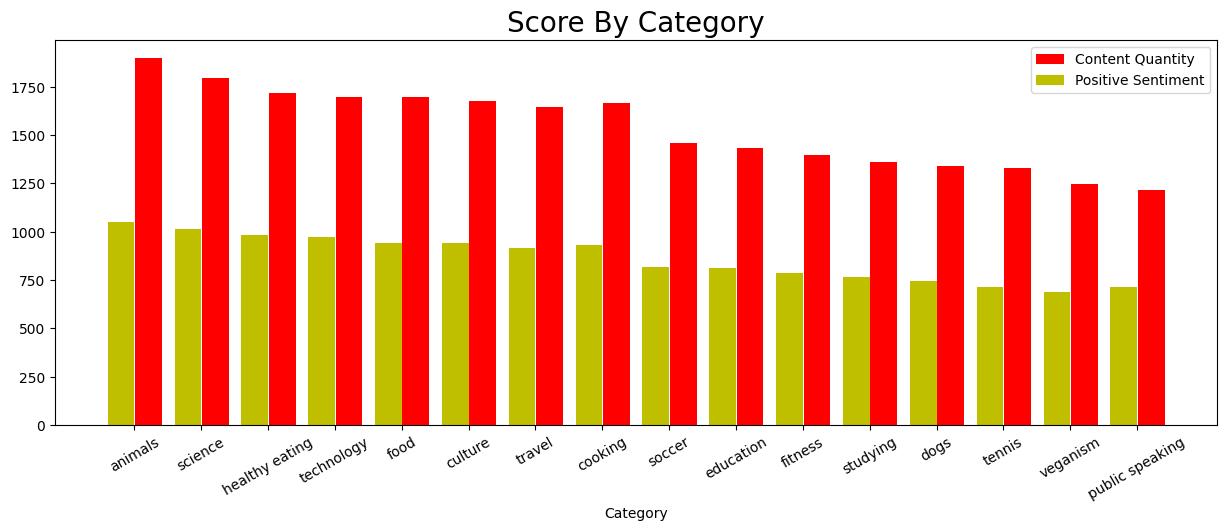

In [57]:
plt.figure(figsize=(15,5))
x =  Df['Category']
width = 0.4
d1 = np.arange(len(x))
d2 = np.array([j+width+0.01 for j in d1])
plt.bar(d2,Df['Total_content'],width=width,color='r',label='Content Quantity')
plt.bar(d1,Df['Positive_Sentiment'],width=width,color='y',label='Positive Sentiment')
plt.title('Score By Category',fontsize=20)
plt.xticks(d1+width/2,Df['Category'],rotation=30)
plt.xlabel('Category',fontsize=10)
plt.legend()
plt.show()